<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/K_means_(EastWestAirlines)_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


In [5]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [9]:
from pandas import read_excel
ewa = pd.read_excel("EastWestAirlines (1).xlsx",sheet_name=1)
ewa.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
ewa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [12]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
df_norm = norm_func(ewa.iloc[:,1:-1])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [17]:
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([1185.5413391]),
 array([971.64087544]),
 array([879.67047802]),
 array([830.00909701]),
 array([765.82100592]),
 array([749.34563602])]

([<matplotlib.axis.XTick at 0x7f1c7badd320>,
 <a list of 6 Text major ticklabel objects>)

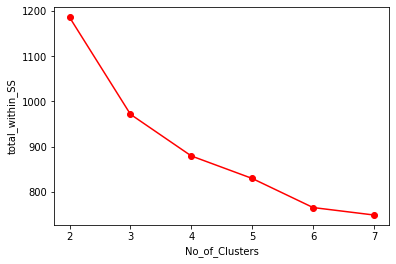

In [18]:
#Elbow Chart
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [26]:
kmeans_clust=KMeans(n_clusters=6)
kmeans_clust.fit(df_norm)
Clusters=pd.DataFrame(kmeans_clust.labels_,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,4
3995,4
3996,2
3997,4


In [27]:
ewa['h_clusterid'] = pd.DataFrame(Clusters)

In [28]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [29]:
#Grouping Data for predictions further 

result=ewa.iloc[:,1:-2].groupby(ewa.h_clusterid).mean()

In [30]:
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
h_clusterid,,,,,,,,,,
0,110066.837251,143.891501,3.506329,1.001808,1.005425,29669.349005,17.609403,405.584087,1.233273,6167.142857
1,77080.294210,192.347418,1.153365,1.017214,1.010955,5462.114241,8.330203,456.284820,1.464789,6639.813772
2,82623.196246,118.616041,3.433447,1.001706,1.008532,29061.933447,18.030717,397.810580,1.150171,2885.575085
3,178533.482639,196.451389,4.965278,1.000000,1.093750,79248.670139,23.281250,902.020833,2.663194,5424.270833
4,37256.464460,132.501461,1.084713,1.014606,1.003895,4376.453749,6.979552,393.574489,1.117819,1728.234664
5,50897.588300,123.251656,1.108168,1.033113,1.003311,4764.096026,7.611479,471.091611,1.419426,4181.913907
